# Exercício 4 – Breast Cancer Prediction – Logistic Regression + Cross-Validation

* https://wwwkaggle.com/datasets/uciml/breast-cancer-wisconsin-data

# Tarefa:
* Criar pipeline com `StandardScaler` + `LogisticRegression`
* Avaliação com validação cruzada (`cross_val_predict`)
* Visualização da matriz de confusão com `seaborn`


# Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Carregar os dados
df = pd.read_csv("data/cancer.csv")  # Certifique-se de que o ficheiro está no diretório de trabalho

# Remover colunas irrelevantes
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Converter 'diagnosis' em valores binários (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separar variáveis independentes e alvo
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [9]:
# Criar pipeline com normalização e regressão logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [10]:
# Obter previsões com validação cruzada (5-fold)
y_pred = cross_val_predict(pipeline, X, y, cv=5)

In [11]:
# Avaliação do modelo
print("Classification Report:")
print(classification_report(y, y_pred))

# Matriz de confusão
cm = confusion_matrix(y, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.99      0.96      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



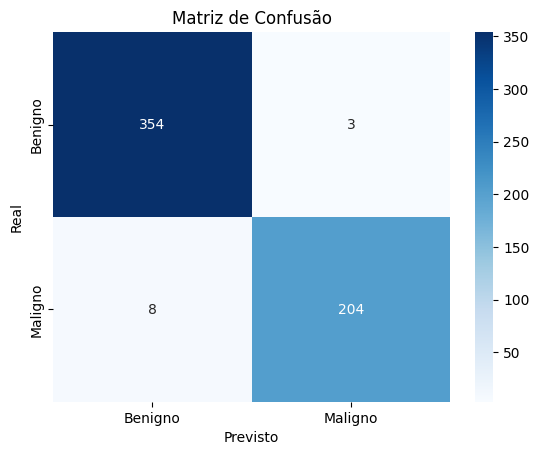

In [12]:
# Visualização da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

--- 
end of file